In [35]:
import numpy as np
from random import gauss
import matplotlib.pyplot as plt
%matplotlib inline

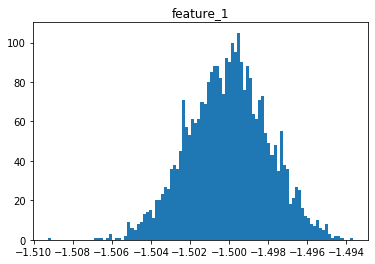

In [20]:
feature_1 = np.random.normal(loc = -1.5, scale = 0.002, size = 3000)
plt.hist(feature_1, bins = 100)
plt.title('feature_1');

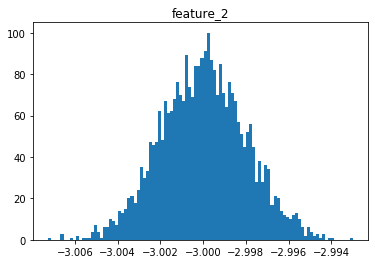

In [21]:
feature_2 = np.random.normal(loc = -3, scale = 0.002, size = 3000)
plt.hist(feature_2, bins = 100)
plt.title('feature_2');

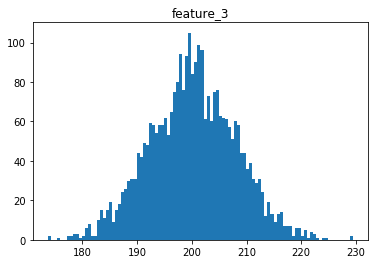

In [23]:
feature_3 = np.random.normal(loc = 200, scale = 8, size = 3000)
plt.hist(feature_3, bins = 100)
plt.title('feature_3');

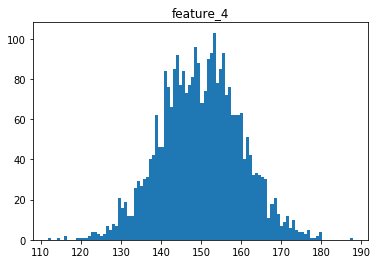

In [24]:
feature_4 = np.random.normal(loc = 150, scale = 10, size = 3000)
plt.hist(feature_4, bins = 100)
plt.title('feature_4');

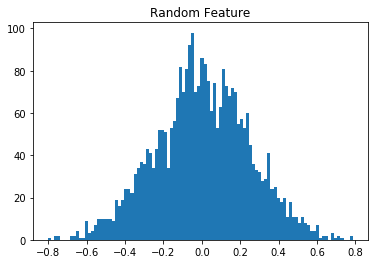

In [41]:
random_feature = [gauss(0, 0.25) for i in range(3000)]
plt.hist(random_feature, bins = 100)
plt.title('Random Feature');

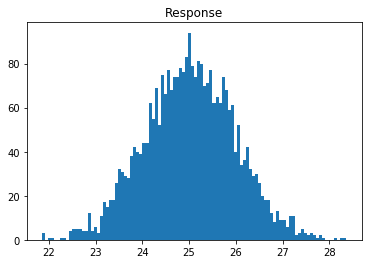

In [51]:
response = (25) * feature_1 + (-25) * feature_2 + 0.1 * feature_3 + 0.05 * feature_4 + random_feature - 40

plt.hist(response, bins = 100)
plt.title('Response');